**Uso de uma Rede Neural Recorrente, para prever investimentos na bolsa de valores**

A base de dados representa investimentos nas ações da Petrobas na bolsa de valores, com o histórico do ano de 2013 ao ano de 2018, em tempos de crise. Dessa forma, o objetivo principal do modelo é gerar um gráfico dos preços das ações, mesmo em tempos de crise.

Você pode encontrar a base de dados, em:

https://br.financas.yahoo.com/

Importações iniciais

In [24]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

Carregando da base de dados de treinamento

In [25]:
dataFrame = pd.read_csv('petr4_treinamento_ex.csv')

A base de treino é composta pelas seguintes features:

* Date - Referente à data de abertura da ação;

* Open - Referente ao valor na abertura da ação;

* High - Referente ao valor máximo da ação;

* Low - Referente ao valor mínimo da ação;

* Close - Referente ao valor que a ação foi fechada;

* Adj Close - Referente ao valor real previsto pela ação;

* Volume - Total de investimentos

In [26]:
dataFrame

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
5,2013-01-09,19.639999,19.870001,19.459999,19.680000,18.077084,24361100.0
6,2013-01-10,19.770000,20.049999,19.540001,19.830000,18.214869,17526200.0
7,2013-01-11,19.850000,20.040001,19.700001,19.879999,18.260794,18223600.0
8,2013-01-14,20.010000,20.240000,19.690001,19.719999,18.113827,28302400.0
9,2013-01-15,20.010000,20.240000,19.690001,19.820000,18.205681,29633900.0


**Pré-processamento dos dados**

Em relação ao valores NaN, podemos realizar três ações:

* Exclução desses valores
* Substituição por 0
* Substituir pela média de cada coluna

In [27]:
dataFrame.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

Visto que a quantidade de valores do tipo NaN é relativamente baixa em relação aos 1245 dados do data set, podemos optar por apagar esses registros.

In [28]:
dataFrame = dataFrame.dropna()

In [29]:
dataFrame.shape

(1342, 7)

Dessa forma, podemos verificar se a função dropna(), conseguiu apagar estes valores nulos:

In [30]:
dataFrame.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Para treinarmos nosso modelo, podemos escolher uma das features temporais, que possa nos auxiliar na nossa target(alvo do modelo):

* Nesse contexto, optei por escolher a feature ***Open*** referente à abertura da ação.

In [31]:
base_treinamento = dataFrame.iloc[:,1:2].values

In [32]:
print(base_treinamento)

[[19.99    ]
 [19.809999]
 [20.33    ]
 ...
 [24.23    ]
 [20.049999]
 [20.65    ]]


Nosso modelo trabalha com valores reais, podemos dizer assim. Dessa forma, podemos encontrar valores muito altos, que podem influenciar no treinamento. Para resolver essa problemática, podemos escolher duas opções:

* Normalização dos dados

* Padronização dos dados

Ambas as técnicas trabalham com o um único objetivo: deixar os dados na mesma grandeza. Para isso, veremos como cada uma trabalha, de forma individual:

**Normalização**

![Min-Max fórmula](https://miro.medium.com/max/202/1*9N7QdpE_CfvkTyirk7_oWw.png)

**Padronização**

<img src="https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2020/04/04155631/1426878678.png " alt="drawing" width="150"/>

Neste modelo, vamos utilizar a técnica de **Normalização**, visto a tratar os outliers nos nossos dados.

In [33]:
from sklearn.preprocessing import MinMaxScaler

Para normalizar esse dados, vamos utilizar a função MinMaxScaler(), que irá transformar os dados em uma escala de 0 e 1.

In [34]:
normalizador = MinMaxScaler(feature_range = [0,1])

In [35]:
base_treinamento_normalizer = normalizador.fit_transform(base_treinamento)

In [36]:
base_treinamento_normalizer

array([[0.68207343],
       [0.67429801],
       [0.69676026],
       ...,
       [0.86522678],
       [0.68466518],
       [0.71058315]])

**Estrutura da base para previsão temporal I**

Quando trabalha-se com dados temporais é preciso definir um intervalo de tempo entre os dados e o alvo. Neste caso, podemos pegar um registro que tenha registros anteriores. 

Exemplo: 

| Dia da semana | Dia | Preço |
|---------------|-----|-------|
| Quinta-feira  | 03  | 19,99 |
| Sexta-feira   | 04  | 19,80 |
| Segunda-feira | 07  | 20,33 |
| Terça-feira   | 08  | 20,48 |
| Quarta-feira  | 09  | 20,11 |

Para prever o preço da Quarta-feira, dia 09, precisamos pegar os valores das 4 datas anteriores:

| **Previsores** |   **Preço real**|
|---------------|-----|
| 19,99 19,80 20,33 20,48 20,11  | 20,11  |


**Estrutura da base para previsão temporal II**

* Prever o preço real através do 90 valores anteriores

In [71]:
previsores = []
preco_real = []

for i in range(90, 1242):
    previsores.append(base_treinamento_normalizer[i-90:i, 0])
    preco_real.append(base_treinamento_normalizer[i, 0])

In [72]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [73]:
previsores.shape

(1152, 90)

Com a utilização da biblioteca Keras, nosso vetor de entradas precisa manter uma dimensão 3D com o formato:

                (batch_size, timesteps, input_dim)
Sendo:

* Batch_size - refere-se ao número de exemplos de treinamento usados em uma intereção

* Timesteps - refere-se a descrição da forma dos dados

* Input_dim - refere-se ao número de entradas

In [74]:
previsores = np.reshape(previsores, (previsores.shape[0],previsores.shape[1],1))

**Estrutura da Rede Neural Recorrente**

In [75]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1],1)))
regressor.add(Dropout(0.3))

In [76]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [77]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [78]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

In [79]:
regressor.add(Dense(units = 1,activation = 'linear'))

In [80]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_squared_error'])

In [81]:
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 2/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 3/100
1152/1152 [==============================] - 6s 6ms/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 4/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 5/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 6/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 7/100
1152/1152 [==============================] - 6s 6ms/step - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 8/100
1152/1152 [==============================] - 6s 6ms/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 9/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0062 - mean_squar

1152/1152 [==============================] - 6s 5ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 73/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 74/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 75/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 76/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 77/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 78/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 79/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 80/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0011 - mean_squared_e

**Previsão de preços de açẽs**

Carregando da base de dados

In [82]:
base_teste = pd.read_csv('petr4_teste_ex.csv')

In [84]:
base_teste

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-28,19.200001,19.200001,16.910000,16.910000,16.910000,134504900
1,2018-05-29,18.000000,19.440001,17.600000,19.299999,19.299999,181509800
2,2018-05-30,18.389999,19.969999,18.129999,18.980000,18.980000,125430000
3,2018-06-01,19.559999,19.750000,14.900000,16.160000,16.160000,216954700
4,2018-06-04,17.290001,17.639999,17.049999,17.530001,17.530001,93547600
5,2018-06-05,17.360001,17.799999,16.590000,16.590000,16.590000,67006400
6,2018-06-06,16.469999,16.680000,15.870000,16.330000,16.330000,69496800
7,2018-06-07,16.000000,16.160000,14.930000,15.760000,15.760000,118752700
8,2018-06-08,15.810000,16.190001,15.060000,15.250000,15.250000,91461500
9,2018-06-11,15.500000,15.800000,15.130000,15.410000,15.410000,44872500


Como estamos fazendo o uso apenas da feature **Open**, vamos extrai-la:

In [85]:
preco_real_teste = base_teste.iloc[:,1:2].values

Precisamos trabalhar com tipos de dados iguais, para evitar erros com a nossa Rede Neural Recorrente, para isso vamos concatenar as suas bases(treino e teste), para facilitar igualdade de tipos.

In [86]:
base_completa = pd.concat((dataFrame['Open'], base_teste['Open']), axis = 0)

In [87]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values

In [88]:
entradas.shape

(109,)

Vamos utilizar a função reshape, para remodelar nosso vetor numpy.

In [89]:
entradas = entradas.reshape(-1,1)

In [90]:
entradas.shape

(109, 1)

Em seguida, colocaremos nossos dados na mesma escala.

In [91]:
entradas = normalizador.transform(entradas)

In [92]:
entradas

array([[0.56803456],
       [0.59265659],
       [0.6112311 ],
       [0.6095032 ],
       [0.60734341],
       [0.61339093],
       [0.61425486],
       [0.65399568],
       [0.66609076],
       [0.66825054],
       [0.67257019],
       [0.6712743 ],
       [0.67213823],
       [0.69546432],
       [0.66738661],
       [0.62462203],
       [0.68120946],
       [0.66306691],
       [0.64060479],
       [0.63974082],
       [0.66090713],
       [0.65917922],
       [0.66306691],
       [0.67732177],
       [0.70799136],
       [0.70799136],
       [0.72354216],
       [0.74298056],
       [0.74600428],
       [0.75291572],
       [0.74298056],
       [0.71274302],
       [0.74686825],
       [0.79049676],
       [0.7555076 ],
       [0.76241901],
       [0.75939529],
       [0.79222467],
       [0.78833698],
       [0.78185741],
       [0.77105827],
       [0.74600428],
       [0.73736501],
       [0.73347732],
       [0.73650108],
       [0.76285102],
       [0.75205188],
       [0.771

Precisamos colocar nossos dados de teste em uma lista. Dessa forma, iremos preencher nosso vetor X_teste.

In [97]:
X_teste = []
for i in range(90,109):
    X_teste.append(entradas[i-90:i, 0])

X_teste = np.array(X_teste)

In [98]:
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [99]:
X_teste.shape

(19, 90, 1)

Agora, iremos realizar nossas previções:

In [100]:
previsoes = regressor.predict(X_teste)

Para visualizarmos as previsoes, iremos fazer um processo inverso à normalização. Dessa forma, iremos visualizar os preços em escalas reais ao início. 

In [101]:
previsoes = normalizador.inverse_transform(previsoes)

In [102]:
previsoes

array([[20.01289  ],
       [19.495865 ],
       [18.473902 ],
       [18.302713 ],
       [19.269228 ],
       [18.185713 ],
       [17.460573 ],
       [16.89062  ],
       [16.419546 ],
       [16.1186   ],
       [15.830648 ],
       [15.682917 ],
       [15.607397 ],
       [15.515145 ],
       [15.281362 ],
       [15.002649 ],
       [14.596799 ],
       [15.3496475],
       [16.058401 ]], dtype=float32)

In [103]:
preco_real_teste

array([[19.200001],
       [18.      ],
       [18.389999],
       [19.559999],
       [17.290001],
       [17.360001],
       [16.469999],
       [16.      ],
       [15.81    ],
       [15.5     ],
       [15.48    ],
       [15.42    ],
       [15.33    ],
       [15.03    ],
       [14.77    ],
       [14.26    ],
       [15.84    ],
       [16.09    ],
       [15.41    ]])

Podemos observar que as previsões não ficaram distantes aos valores reais. Dessa maneira, podemos visualizar a média das previsoes e a média do preço real:

In [104]:
previsoes.mean()

16.818663

In [105]:
preco_real_teste.mean()

16.379473684210524

In [107]:
diferenca = previsoes.mean() - preco_real_teste.mean()
print(diferenca)

0.43918895922209344


Para visualizarmos o quanto as previsoes puderam se aproximar dos valores reais, podemos fazer um gráfico com ambos os vetores. Para isso, vamos utilizar a biblioteca **matplotlib**, para plotar esses valores.

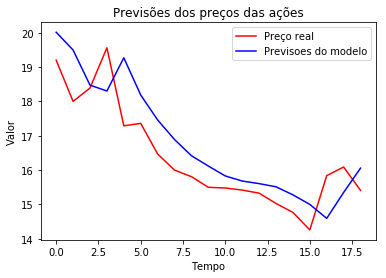

In [108]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsoes do modelo')
plt.title('Previsões dos preços das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

**Referências**

https://www.udemy.com/course/deep-learning-com-python-az-curso-completo/learn/lecture/10897310#questions

https://translate.googleusercontent.com/translate_c?depth=1&hl=pt-BR&prev=search&rurl=translate.google.com&sl=en&sp=nmt4&u=https://stackoverflow.com/questions/38714959/understanding-keras-lstms&usg=ALkJrhgwRgxszeum-5XuG2HTiE0KM75Wog

https://www.google.com/search?q=LSTM&client=ubuntu&hs=DAN&channel=fs&sxsrf=ALeKk02TzfQeiFwQ3Hw3VX9kUWN9kBiJ6g:1592424774740&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiBip7I1InqAhU0D7kGHfcuDHsQ_AUoAXoECA8QAw